In [76]:
import pandas as pd
import os

In [77]:
#check curr directory.
print("current directory:", os.getcwd())

#load the datasets
df1 = pd.read_csv("Naukri_Data_Scientist_and_Data_Analytics_Jobs_Data.csv")
df2 = pd.read_csv("NaukriData_data analytics.csv")
df3 = pd.read_csv("NaukriData_Data Science.csv")

#show quick info about the datasets
print("dset1 shape:", df1.shape)
print("dset2 shape:", df2.shape)
print("dset3 shape:", df3.shape)

current directory: C:\Users\dsayl\OneDrive\Desktop\Job_Market_insights\Data
dset1 shape: (19649, 6)
dset2 shape: (20064, 8)
dset3 shape: (47191, 8)


In [8]:

# Rename columns for consistency
rename_map = {
    'Job_Titles': 'job_title',
    'Job Titles': 'job_title',
    'Company_Names': 'company_name',
    'Company Names': 'company_name',
    'Experience_Required': 'experience',
    'Experience Required': 'experience',
    'Package_Details': 'package',
    'Package': 'package',
    'Locations': 'location',
    'Skills': 'skills',
    'Post_Url': 'post_url',
    'Post_Time': 'post_time'
}


df1.rename(columns = rename_map, inplace = True)
df1.rename(columns = rename_map, inplace = True)
df1.rename(columns = rename_map, inplace = True)

# Add missing cols in df1
for col in ['post_url', 'post_time']:
    if col not in df1.columns:
        df1[col]= None

# Combine all the dsets.
combined_df = pd.concat([df1, df2, df3], ignore_index = True)

#check
print("combined dset shape:", combined_df.shape)


combined dset shape: (86904, 16)


In [12]:
print("col names:", combined_df.columns)

print("missing val:", combined_df.isnull().sum())

col names: Index(['job_title', 'company_name', 'experience', 'package', 'location',
       'skills', 'post_url', 'post_time', 'Job_Titles', 'Company_Names',
       'Experience_Required', 'Package_Details', 'Locations', 'Skills',
       'Post_Url', 'Post_Time'],
      dtype='object')
missing val: job_title              67382
company_name           67382
experience             67669
package                67382
location               67315
skills                 67438
post_url               86904
post_time              86904
Job_Titles             33230
Company_Names          31020
Experience_Required    31148
Package_Details        28226
Locations              27705
Skills                 29094
Post_Url               27004
Post_Time              26964
dtype: int64


In [13]:
# Merge Duplicate Columns

import numpy as np

# Define column pairs to merge
column_pairs = [
    ('job_title', 'Job_Titles'),
    ('company_name', 'Company_Names'),
    ('experience', 'Experience_Required'),
    ('package', 'Package_Details'),
    ('location', 'Locations'),
    ('skills', 'Skills'),
    ('post_url', 'Post_Url'),
    ('post_time', 'Post_Time')
]

# For each pair, fill missing values in lowercase column using uppercase one
for col1, col2 in column_pairs:
    if col1 in combined_df.columns and col2 in combined_df.columns:
        combined_df[col1] = combined_df[col1].fillna(combined_df[col2])
        combined_df.drop(columns=[col2], inplace=True, errors='ignore')

# Verify cleanup
print("Columns after cleanup:")
print(combined_df.columns)

print("\nMissing values per column:")
print(combined_df.isnull().sum())

combined_df.head(3)


✅ Columns after cleanup:
Index(['job_title', 'company_name', 'experience', 'package', 'location',
       'skills', 'post_url', 'post_time'],
      dtype='object')

Missing values per column:
job_title       13708
company_name    11498
experience      11913
package          8704
location         8116
skills           9628
post_url        27004
post_time       26964
dtype: int64


,job_title,company_name,experience,package,location,skills,post_url,post_time
0,Manager - Digital Product Analytics [Data Scie...,Resy,4-8 Yrs,Not disclosed,Gurgaon/Gurugram,Product managementCareer developmentOperations...,NaN,NaN
1,Data Science Domain Manager,Coursera,7-11 Yrs,Not disclosed,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",Computer scienceContent strategyData analysisU...,NaN,NaN
2,GN - Strategy - MC - T&O - NLP Data Science - ...,Accenture,1-3 Yrs,Not disclosed,"Mumbai, Hyderabad/Secunderabad, Pune, Gurgaon/...",Change managementSASCodingData miningPythonRst...,NaN,NaN


In [14]:
print("col names:", combined_df.columns)

print("missing val:", combined_df.isnull().sum())

col names: Index(['job_title', 'company_name', 'experience', 'package', 'location',
       'skills', 'post_url', 'post_time'],
      dtype='object')
missing val: job_title       13708
company_name    11498
experience      11913
package          8704
location         8116
skills           9628
post_url        27004
post_time       26964
dtype: int64


In [15]:
# DATA CLEANING!!!!

In [22]:
# A: Remove duplicates.

print("duplicate rows before: ", combined_df.duplicated().sum())
combined_df.drop_duplicates(inplace = True)

print("duplicate rows now: ", combined_df.duplicated().sum())

print("shape: ", combined_df.shape)

duplicate rows before:  0
duplicate rows now:  0
shape:  (62468, 8)


In [31]:
combined_df.head(20)

,job_title,company_name,experience,package,location,skills
0,manager - digital product analytics [data scie...,resy,4-8 yrs,not disclosed,gurgaon/gurugram,product managementcareer developmentoperations...
1,data science domain manager,coursera,7-11 yrs,not disclosed,"kolkata, mumbai, new delhi, hyderabad/secunder...",computer sciencecontent strategydata analysisu...
2,gn - strategy - mc - t&o - nlp data science - ...,accenture,1-3 yrs,not disclosed,"mumbai, hyderabad/secunderabad, pune, gurgaon/...",change managementsascodingdata miningpythonrst...
3,data science manager,foreign it consulting mnc,2-6 yrs,not disclosed,gurgaon/gurugram,operations researchsasfinanceproject managemen...
4,data science manager,foreign it consulting mnc,3-6 yrs,not disclosed,noida,data analysisedcrisk assessmentrisk modelingma...
5,unknown,unknown,6-10 yrs,not disclosed,"gurgaon/ gurugram, haryana",advanced statistical analysisdata governance a...
6,unknown,unknown,8-10 yrs,not disclosed,hyderabad/secunderabad,statistical programmingdata analysisautomation...
7,unknown,unknown,12-15 yrs,not disclosed,"hybrid - noida, uttar pradesh",nlpdata sciencepredictive modelingteam managem...
8,"analyst- data science (python, microsoft power...",american express,3-6 yrs,not disclosed,gurgaon/gurugram,operations researchsasfinanceproject managemen...
9,data science - senior data scientist,paytm,1-4 yrs,not disclosed,"mumbai, hyderabad/secunderabad, pune, gurgaon/...",data sciencedata analyticssasdata miningpython...


In [25]:
# B: Handle Missing values/ Nulls.

#drop uneccessary cols
combined_df.drop(columns=['post_url','post_time'], inplace = True)

#fill nulls with 'Unknown'
combined_df['job_title'].fillna('Unknown', inplace = True)
combined_df['company_name'].fillna('Unknown', inplace = True)
combined_df['location'].fillna('Unknown', inplace = True)
combined_df['skills'].fillna('Unknown', inplace = True)

#for numerical cols, 'not specified'

combined_df['experience'].fillna('Not specified', inplace = True)
combined_df['package'].fillna('Not spcified', inplace = True)

print(combined_df.isnull().sum())


job_title       0
company_name    0
experience      0
package         0
location        0
skills          0
dtype: int64


C:\Users\dsayl\AppData\Local\Temp\ipykernel_11404\3979935807.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['job_title'].fillna('Unknown', inplace = True)
C:\Users\dsayl\AppData\Local\Temp\ipykernel_11404\3979935807.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [33]:
#Convert text cols to lowercase and strip extra spaces.

text_cols = ['job_title', 'company_name', 'location', 'skills']
combined_df[text_cols] = combined_df[text_cols].apply(lambda x: x.str.lower())

combined_df['experience'] = combined_df['experience'].str.replace('yrs', '').str.strip()
combined_df['experience'] = combined_df['experience'].replace({'': 'Not specified', '-': 'Not specified'})

combined_df['package'] = combined_df['package'].str.replace('₹', '').str.replace('not disclosed', 'Not specified').str.strip()

combined_df['location'] = combined_df['location'].str.split(',')
combined_df = combined_df.explode('location')

# Clean and standardize locations
combined_df['location'] = (
    combined_df['location']
    .astype(str)
    .str.strip()                # remove leading/trailing whitespace
    .str.lower()                # make lowercase
)

location_mapping = {
    'gurgaon/gurugram': 'gurgaon',
    'hyderabad/secunderabad': 'hyderabad',
    'bangalore/bengaluru': 'bangalore',
    'noida/greater noida': 'noida',
    'mumbai (all areas)': 'mumbai'
}
combined_df['location'] = combined_df['location'].replace(location_mapping)

combined_df.drop_duplicates(inplace=True)

combined_df.reset_index(drop=True, inplace=True)

print(" Missing values after cleaning:\n", combined_df.isnull().sum())
print("\n Shape after cleaning:", combined_df.shape)
print("\n Sample data:")
display(combined_df.head(10))

 Missing values after cleaning:
 job_title       0
company_name    0
experience      0
package         0
location        0
skills          0
dtype: int64

 Shape after cleaning: (90598, 6)

 Sample data:


,job_title,company_name,experience,package,location,skills
0,manager - digital product analytics [data scie...,resy,4-8,Not specified,gurgaon,product managementcareer developmentoperations...
1,data science domain manager,coursera,7-11,Not specified,kolkata,computer sciencecontent strategydata analysisu...
2,data science domain manager,coursera,7-11,Not specified,mumbai,computer sciencecontent strategydata analysisu...
3,data science domain manager,coursera,7-11,Not specified,new delhi,computer sciencecontent strategydata analysisu...
4,data science domain manager,coursera,7-11,Not specified,hyderabad,computer sciencecontent strategydata analysisu...
5,data science domain manager,coursera,7-11,Not specified,pune,computer sciencecontent strategydata analysisu...
6,data science domain manager,coursera,7-11,Not specified,chennai,computer sciencecontent strategydata analysisu...
7,data science domain manager,coursera,7-11,Not specified,bangalore,computer sciencecontent strategydata analysisu...
8,gn - strategy - mc - t&o - nlp data science - ...,accenture,1-3,Not specified,mumbai,change managementsascodingdata miningpythonrst...
9,gn - strategy - mc - t&o - nlp data science - ...,accenture,1-3,Not specified,hyderabad,change managementsascodingdata miningpythonrst...


In [34]:
#Standardize location names
combined_df['location'].unique()[:30]

array(['gurgaon', 'kolkata', 'mumbai', 'new delhi', 'hyderabad', 'pune',
       'chennai', 'bangalore', 'noida', 'gurgaon/ gurugram', 'haryana',
       'hybrid - noida', 'uttar pradesh', 'faridabad', 'remote',
       'hybrid - hyderabad/secunderabad', 'lucknow',
       'noida(sector-126 noida)', 'hybrid - bangalore/bengaluru',
       'delhi / ncr', 'navi mumbai', 'delhi', 'hybrid - chennai',
       'west bengal', 'bangalore/bengaluru(dodda nekkundi)',
       'calicut/ kozhikode', 'kerala', 'ahmedabad',
       'maharashtra(kalyani nagar)', 'thane'], dtype=object)

In [36]:
# update 'gurgaon/ gurugram',  'hybrid - hyderabad/secunderabad', 'bangalore/bengaluru(dodda nekkundi)' etc

combined_df['location'] = (
    combined_df['location']
    .astype(str)
    .str.strip()
    .str.lower()
)


combined_df['location'] = (
    combined_df['location']
    .replace({
        r'.*gurgaon.*': 'gurgaon',
        r'.*gurugram.*': 'gurgaon',
        r'.*noida.*': 'noida',
        r'.*hyderabad.*': 'hyderabad',
        r'.*secunderabad.*': 'hyderabad',
        r'.*bangalore.*': 'bangalore',
        r'.*bengaluru.*': 'bangalore',
        r'.*delhi.*': 'delhi',
        r'.*ncr.*': 'delhi',
        r'.*mumbai.*': 'mumbai',
        r'.*thane.*': 'mumbai',
        r'.*navi mumbai.*': 'mumbai',
        r'.*kalyani nagar.*': 'pune',
        r'.*pune.*': 'pune',
        r'.*chennai.*': 'chennai',
        r'.*calicut.*': 'kozhikode',
        r'.*kozhikode.*': 'kozhikode',
        r'.*ahmedabad.*': 'ahmedabad',
        r'.*remote.*': 'remote',
        r'.*lucknow.*': 'lucknow',
        r'.*kerala.*': 'kerala',
        r'.*haryana.*': 'haryana',
        r'.*west bengal.*': 'west bengal'
    }, regex=True)
)

print(combined_df['location'].unique())
    


['gurgaon' 'kolkata' 'mumbai' 'delhi' 'hyderabad' 'pune' 'chennai'
 'bangalore' 'noida' 'haryana' 'uttar pradesh' 'faridabad' 'remote'
 'lucknow' 'west bengal' 'kozhikode' 'kerala' 'ahmedabad' 'karnataka'
 'maharashtra' 'karnataka(electronic city)' 'warangal'
 'tiruchirapalli/trichy' 'madurai' 'trivandrum/ thiruvananthapuram'
 'hassan' 'kolar' 'telangana' 'tamil nadu' 'betul' 'mohali' 'chandigarh'
 'trivandrum/thiruvananthapuram' 'salem' 'coimbatore' 'kochi/cochin'
 'ernakulam' 'united states (usa)' 'bulgaria' 'tamil nadu(perungudi)'
 'guwahati' 'udaipur' 'rajasthan' 'hybrid - coimbatore' 'indore'
 'madhya pradesh' 'dehradun' 'agra' 'ranchi' 'nagpur' 'hybrid - kolkata'
 'bhopal' 'patna' 'bihar' 'jaipur' 'punjab' 'surat' 'ghaziabad'
 'dongargaon' 'karnataka(hsr layout)' 'kochi/ cochin' 'vijayawada'
 'andhra pradesh' 'vadodara' 'bhubaneswar' 'telangana(jubilee hills)'
 'saudi arabia' 'canada' 'karnataka(1st stage indira nagar +1)'
 'maharashtra(kharadi)' 'nasik/nashik' 'aurangabad' 'myso

In [37]:
import re

# Define regex-based city mapping
mapping = {
    'bangalore': r'bangalore|bengaluru',
    'hyderabad': r'hyderabad|secunderabad',
    'mumbai': r'mumbai|thane|navi mumbai',
    'delhi': r'delhi|ncr|new delhi',
    'gurgaon': r'gurgaon|gurugram',
    'noida': r'noida',
    'pune': r'pune|kalyani nagar',
    'chennai': r'chennai',
    'kozhikode': r'kozhikode|calicut',
    'ahmedabad': r'ahmedabad',
    'lucknow': r'lucknow',
    'kerala': r'kerala',
    'haryana': r'haryana',
    'west bengal': r'west bengal',
    'remote': r'remote',
}

# Function to normalize each location cell
def normalize_location(loc):
    loc = str(loc).lower().strip()
    
    # Handle 'hybrid -' or any text before/after city names
    loc = re.sub(r'hybrid\s*-\s*', '', loc)
    loc = re.sub(r'\(.*?\)', '', loc)  # remove text in parentheses
    
    # Match using mapping
    for city, pattern in mapping.items():
        if re.search(pattern, loc):
            return city
    
    return 'other'  # fallback for anything unrecognized

# Apply normalization to entire column
combined_df['location'] = combined_df['location'].apply(normalize_location)

# Check unique cleaned values
print(combined_df['location'].unique())
print("Total unique locations:", combined_df['location'].nunique())


['gurgaon' 'other' 'mumbai' 'delhi' 'hyderabad' 'pune' 'chennai'
 'bangalore' 'noida' 'haryana' 'remote' 'lucknow' 'west bengal'
 'kozhikode' 'kerala' 'ahmedabad']
Total unique locations: 16


 Job Postings by City:

location
bangalore      18184
other          15868
hyderabad       9728
mumbai          9541
pune            7854
gurgaon         7615
chennai         6269
delhi           5701
remote          3344
noida           3160
haryana         1600
ahmedabad       1131
lucknow          172
kerala           151
kozhikode        143
west bengal      137
Name: count, dtype: int64


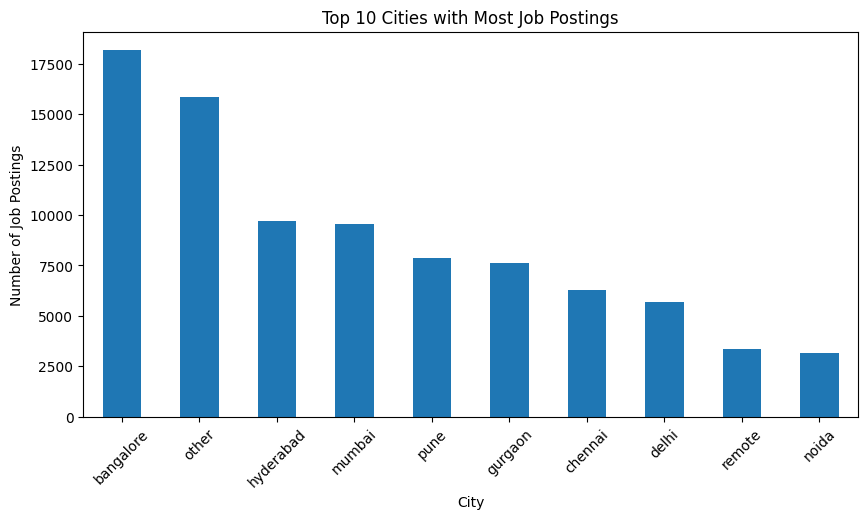

In [79]:
# Show count of job postings per city (sorted)
location_counts = combined_df['location'].value_counts()

print(" Job Postings by City:\n")
print(location_counts)

# visualisation in a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
location_counts.head(10).plot(kind='bar')
plt.title('Top 10 Cities with Most Job Postings')
plt.xlabel('City')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.show()

In [43]:
# EXPERIENCE COLUMN.

combined_df['experience'] = combined_df['experience'].replace('not specified', np.nan)

import numpy as np
import re

def extract_experience(value):
    if pd.isna(value):
        return np.nan, np.nan
    value = str(value).lower()
    
    if 'fresher' in value:
        return 0, 0
    elif '+' in value:
        num = re.findall(r'\d+', value)
        return (int(num[0]), int(num[0])) if num else (np.nan, np.nan)
    elif '-' in value:
        nums = re.findall(r'\d+', value)
        return (int(nums[0]), int(nums[1])) if len(nums) == 2 else (np.nan, np.nan)
    else:
        num = re.findall(r'\d+', value)
        return (int(num[0]), int(num[0])) if num else (np.nan, np.nan)

combined_df[['min_exp', 'max_exp']] = combined_df['experience'].apply(lambda x: pd.Series(extract_experience(x)))

combined_df[['experience', 'min_exp', 'max_exp']].head(15)

combined_df['min_exp'] = combined_df['min_exp'].fillna(combined_df['min_exp'].median())
combined_df['max_exp'] = combined_df['max_exp'].fillna(combined_df['max_exp'].median())

In [44]:
combined_df[['experience', 'min_exp', 'max_exp']].head(15)

,experience,min_exp,max_exp
0,4-8,4.0,8.0
1,7-11,7.0,11.0
2,7-11,7.0,11.0
3,7-11,7.0,11.0
4,7-11,7.0,11.0
5,7-11,7.0,11.0
6,7-11,7.0,11.0
7,7-11,7.0,11.0
8,1-3,1.0,3.0
9,1-3,1.0,3.0


In [45]:
#PACKAGE

combined_df['package'].value_counts().head(20)


package
Not specified      80091
unpaid              1704
6-10 lacs pa         968
18-22.5 lacs pa      558
not spcified         282
10-20 lacs pa        204
20-35 lacs pa        167
15-20 lacs pa        148
15-30 lacs pa        135
15-25 lacs pa        123
8-12 lacs pa         105
10-15 lacs pa        103
3-6 lacs pa          101
20-25 lacs pa        100
3-8 lacs pa           94
4-9 lacs pa           88
4-6 lacs pa           87
25-40 lacs pa         83
25-35 lacs pa         82
20-30 lacs pa         81
Name: count, dtype: int64

In [49]:
import numpy as np
import re

# convert to lowercase
combined_df['package'] = combined_df['package'].str.lower().str.strip()

# replace common non-numeric cases
combined_df['package'] = combined_df['package'].replace(
    ['not disclosed', 'na', 'n/a', '-', 'nan', 'not specified', 
     'not spcified', 'none'], 
    np.nan
)

# function to extract salary range
def extract_salary_range(text):
    if pd.isna(text):
        return np.nan, np.nan
    
    if "unpaid" in text:
        return 0.0, 0.0

    # handle "upto 10 lacs pa"
    upto_match = re.search(r'upto\s*(\d+(\.\d+)?)', text)
    if upto_match:
        value = float(upto_match.group(1))
        return 0.0, value

    # handle "10-15 lacs pa" etc.
    match = re.findall(r'(\d+(?:\.\d+)?)', text)
    if len(match) == 2:
        return float(match[0]), float(match[1])
    elif len(match) == 1:
        val = float(match[0])
        return val, val
    else:
        return np.nan, np.nan

combined_df[['min_salary', 'max_salary']] = combined_df['package'].apply(
    lambda x: pd.Series(extract_salary_range(x))
)

# optional: average salary
combined_df['avg_salary'] = combined_df[['min_salary', 'max_salary']].mean(axis=1)


In [57]:
combined_df.head()


,job_title,company_name,experience,package,location,skills,min_exp,max_exp,min_salary,max_salary,avg_salary
0,manager - digital product analytics [data scie...,resy,4-8,NaN,gurgaon,product managementcareer developmentoperations...,4.0,8.0,NaN,NaN,NaN
1,data science domain manager,coursera,7-11,NaN,other,computer sciencecontent strategydata analysisu...,7.0,11.0,NaN,NaN,NaN
2,data science domain manager,coursera,7-11,NaN,mumbai,computer sciencecontent strategydata analysisu...,7.0,11.0,NaN,NaN,NaN
3,data science domain manager,coursera,7-11,NaN,delhi,computer sciencecontent strategydata analysisu...,7.0,11.0,NaN,NaN,NaN
4,data science domain manager,coursera,7-11,NaN,hyderabad,computer sciencecontent strategydata analysisu...,7.0,11.0,NaN,NaN,NaN


In [64]:
combined_df['skills'].sample(10).values

array(['computer scienceerporacle sqlbusiness analysisit projectsworkflowasp.nethtml',
       'computer scienceautomationdata servicesdata sciencefinancereconciliationbillingmachine learning',
       'data engineeringplatform engineeringcloudhadoopbig datatechnology leadershipdatatechnology',
       'text miningcareer developmentdata sciencefinancemachine learningdata miningstakeholder managementsql',
       'unknown',
       'analytical skillspre sales executivedata analysiscvbusiness analystsoftware development life cycleclient presentationsms office word',
       'structured financemanager technologyasset managementmacrosanalyticsprivate equityfinancial servicesmonitoring',
       'analytical skillsb2bbusiness analystcompetitive analysisproject managementoperationsanalysismanagement',
       'supply chainhospitalitycustomer analyticsbusiness analyticsconsultingmanagement consultingbusiness solutionsproject delivery',
       'azure data factorypysparkazure databricksazure data lakepy

In [66]:
# FIX the skills, insert commas and spaces

import pandas as pd

# Step 1: Define known skills (expand this list as you go)
known_skills = [
    'data analysis', 'data analytics', 'bi tools', 'ab initio', 'data warehousing', 
    'etl', 'aws', 'solution architect', 'sql', 'python', 'power bi', 'tableau', 
    'business intelligence', 'data modeling', 'machine learning', 'deep learning',
    'data visualization', 'gcp', 'nosql', 'ssis', 'ssrs', 'excel', 'cloud computing',
    'azure', 'pandas', 'numpy', 'statistics', 'business analysis', 'java',
    'project management', 'sas', 'hadoop', 'spark', 'r', 'communication skills',
    'ai', 'nlp', 'scikit-learn', 'django', 'flask', 'azure'
]

# Step 2: Define the function to extract known skills from the messy text
def extract_skills(text):
    # Return NaN if the cell is empty
    if pd.isna(text):
        return np.nan
    
    # Convert text to lowercase for uniformity
    text = text.lower()
    matched_skills = []

    # Loop through each skill in our known skills list
    for skill in known_skills:
        # This line checks if the skill word/phrase appears in the text
        if skill in text:
            matched_skills.append(skill)

    # If at least one match found, join them with commas
    if matched_skills:
        return ', '.join(sorted(set(matched_skills)))  # remove duplicates, alphabetically sorted
    else:
        return np.nan  # No known skills detected

# Step 3: Apply the function to your 'skills' column
combined_df['cleaned_skills'] = combined_df['skills'].apply(extract_skills)

# Step 4: Verify the output
combined_df[['skills', 'cleaned_skills']].head(10)


,skills,cleaned_skills
0,product managementcareer developmentoperations...,"data modeling, machine learning, r, sql"
1,computer sciencecontent strategydata analysisu...,"data analysis, data analytics, machine learnin..."
2,computer sciencecontent strategydata analysisu...,"data analysis, data analytics, machine learnin..."
3,computer sciencecontent strategydata analysisu...,"data analysis, data analytics, machine learnin..."
4,computer sciencecontent strategydata analysisu...,"data analysis, data analytics, machine learnin..."
5,computer sciencecontent strategydata analysisu...,"data analysis, data analytics, machine learnin..."
6,computer sciencecontent strategydata analysisu...,"data analysis, data analytics, machine learnin..."
7,computer sciencecontent strategydata analysisu...,"data analysis, data analytics, machine learnin..."
8,change managementsascodingdata miningpythonrst...,"python, r, sas"
9,change managementsascodingdata miningpythonrst...,"python, r, sas"


In [67]:
#EXPLODE THE SKILLLLSSSSS

# 1️. Make a copy to keep original data safe
skills_df = combined_df.copy()

# 2️. Drop rows where cleaned_skills is missing
skills_df = skills_df.dropna(subset=['cleaned_skills'])

# 3️. Split the skills by comma and strip spaces
skills_df['cleaned_skills'] = skills_df['cleaned_skills'].apply(lambda x: [s.strip() for s in x.split(',')])

# 4️. Explode the list into multiple rows
skills_df = skills_df.explode('cleaned_skills')

# 5️. Normalize (lowercase and remove duplicates)
skills_df['cleaned_skills'] = skills_df['cleaned_skills'].str.lower().str.strip()

# 6️. Verify
print(skills_df['cleaned_skills'].head(10))
print("Shape after exploding:", skills_df.shape)


0       data modeling
0    machine learning
0                   r
0                 sql
1       data analysis
1      data analytics
1    machine learning
1                   r
2       data analysis
2      data analytics
Name: cleaned_skills, dtype: object
Shape after exploding: (253866, 12)


In [68]:
skills_df['cleaned_skills'].value_counts().head(10)


cleaned_skills
r                     86655
data analysis         26994
machine learning      20174
sql                   19185
ai                    10579
python                 9474
business analysis      8035
data analytics         7968
excel                  6818
project management     6266
Name: count, dtype: int64

In [71]:
# Remove standalone 'r' if it's suspiciously inflated
skills_df = skills_df[skills_df['cleaned_skills'] != 'r']

In [75]:

# Extended Skill Normalization Dictionary

skill_synonyms = {
    # --- Core Analytics Terms ---
    'data analysis': 'data analytics',
    'data analytic': 'data analytics',
    'analysis': 'data analytics',
    'data analyst': 'data analytics',

    # --- Machine Learning & AI ---
    'ml': 'machine learning',
    'deep learning': 'machine learning',
    'ai': 'artificial intelligence',
    'artificial intelligence (ai)': 'artificial intelligence',
    'neural networks': 'machine learning',
    'nlp': 'natural language processing',

    # --- Visualization & BI Tools ---
    'powerbi': 'power bi',
    'bi tools': 'power bi',
    'business intelligence': 'power bi',
    'tableu': 'tableau',
    'tableau desktop': 'tableau',
    'data visualization': 'data visualization',

    # --- Programming Languages ---
    'py': 'python',
    'python3': 'python',
    'r programming': 'r',
    'r language': 'r',
    'r-programming': 'r',
    'java programming': 'java',
    'c++': 'cpp',
    'cplusplus': 'cpp',

    # --- Databases ---
    'sql server': 'sql',
    'mysql': 'sql',
    'postgresql': 'sql',
    'oracle sql': 'sql',
    'nosql database': 'nosql',
    'mongodb': 'nosql',

    # --- Excel & Office Tools ---
    'microsoft excel': 'excel',
    'excel skills': 'excel',
    'advanced excel': 'excel',
    'ms excel': 'excel',
    'spreadsheet': 'excel',

    # --- Cloud & Big Data ---
    'aws cloud': 'aws',
    'azure cloud': 'azure',
    'google cloud': 'gcp',
    'big data analytics': 'big data',
    'spark': 'apache spark',
    'hadoop': 'apache hadoop',

    # --- Data Engineering Tools ---
    'data warehouse': 'data warehousing',
    'data warehous': 'data warehousing',
    'data modeling': 'data modeling',
    'etl developer': 'etl',
    'data engineer': 'data engineering',

    # --- Business / Management ---
    'business analysis': 'business analytics',
    'requirement analysis': 'business analytics',
    'project management': 'project management',
    'agile methodology': 'agile',
    'scrum master': 'scrum',

    # --- Others ---
    'statistics': 'statistics',
    'sas analytics': 'sas',
    'matplotlib': 'python',
    'pandas': 'python',
    'numpy': 'python',
    'flask framework': 'flask',
    'django framework': 'django'
}

# Apply replacements on your exploded skills dataframe
skills_df['cleaned_skills'] = skills_df['cleaned_skills'].replace(skill_synonyms)

# Optional: remove trailing/leading spaces and lowercase everything again
skills_df['cleaned_skills'] = skills_df['cleaned_skills'].str.lower().str.strip()

# Check top results
skills_df['cleaned_skills'].value_counts().head(20)


cleaned_skills
data analytics             34962
machine learning           22730
sql                        19185
artificial intelligence    10579
python                      9833
power bi                    8726
business analytics          8035
excel                       6818
project management          6266
data modeling               5544
sas                         4294
data visualization          4158
gcp                         3236
java                        2583
tableau                     2445
nosql                       2295
azure                       1708
apache spark                1676
data warehousing            1519
aws                         1513
Name: count, dtype: int64

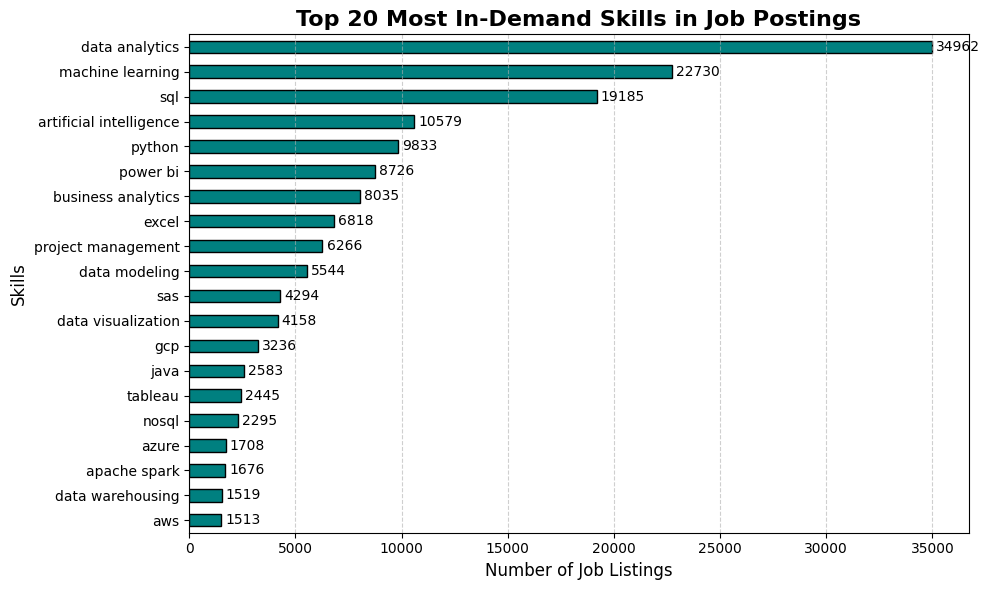

In [84]:
# VISUALISATION OF TOP 20 SKILLS 

import matplotlib.pyplot as plt

# Get top 20 most common skills
top_skills = skills_df['cleaned_skills'].value_counts().head(20)

# Set figure size
plt.figure(figsize=(10,6))

# Plot the horizontal bar chart
top_skills.sort_values().plot(
    kind='barh', 
    color='teal', 
    edgecolor='black'
)

# Add titles and labels
plt.title('Top 20 Most In-Demand Skills in Job Postings', fontsize=16, fontweight='bold')
plt.xlabel('Number of Job Listings', fontsize=12)
plt.ylabel('Skills', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

for index, value in enumerate(top_skills.sort_values()):
    plt.text(value + 200, index, str(value), va='center')


# Adjust layout and show
plt.tight_layout()
plt.show()


In [85]:
# EXPORT DATASET

combined_df.to_csv("cleaned_job_data.csv", index=False)


In [86]:
skills_df.to_csv("cleaned_skills_data.csv", index=False)
